## Networkx
- 단어들과 단어들 사이에 연관성이 깊은지, 시각적으로 나타내 보여줄 수 있는 모듈

In [ ]:
!pip install networkx

In [ ]:
pip install konlpy

In [ ]:
import konlpy
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

In [ ]:
import networkx as nx
import matplotlib.font_manager as font_manager
from matplotlib import rc
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
abstract = pd.read_csv('')

### Exercise - News api 사용해 english article network analysis

- https://newsapi.org/
- Get API Key

In [ ]:
import requests
url = ('https://newsapi.org/v2/everything?'
       'q=bitcoin&'
       'from=2022-02-01&'
       'sortBy=popularity&'
       'language=en&'
       'apiKey=7b6145999f6c411e888c840b63c796a0')

response = requests.get(url)
json = response.json()

In [ ]:
json

{'articles': [{'author': 'Jeff Somers',
   'content': 'Even if you arent paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 tr… [+4782 chars]',
   'description': 'Even if you aren’t paying attention to Bitcoin and other cryptocurrencies, you might have noticed that their value plummeted last week, with the total value of the market tumbling from a high of $3 trillion last year to about $1.5 trillion in a matter of days…',
   'publishedAt': '2022-02-09T16:00:00Z',
   'source': {'id': None, 'name': 'Lifehacker.com'},
   'title': 'Is the Crypto Bubble Going to Burst?',
   'url': 'https://lifehacker.com/is-the-crypto-bubble-going-to-burst-1848475768',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/976a59b09e0e681e692bd7517498e3f2.jpg'},
  {'author': 'Andy Greenberg',
   'content': 'O

In [ ]:
articles = json['articles']
type(articles)

list

In [ ]:
article_list = []

for adict in articles:
    title = adict['title']
    article_list.append(title)
print(len(article_list))
print(article_list)

20
['Most Frequently Asked Questions About NFTs(Non-Fungible Tokens)', 'CRYPTOVERSE-Bitcoin squeezes smaller rivals to its crown - Reuters', 'Bitcoin surges 8.82% to $40611 - Reuters', 'Investor-focused social media firm Stocktwits rolls out crypto trading - Reuters', 'Crypto network Wormhole hit with possible $320 mln hack - Reuters', "Reddit co-founder Ohanian's venture capital firm raises $500 mln - Reuters", "Reddit co-founder Ohanian's venture capital firm raises $500 mln - Reuters.com", 'Exxon Mobil, Xometry, Gannett - Reuters', 'Cedar Fair, PG&E Corp, Chevron Corp - Reuters', 'Analysis: U.S. IPO slowdown slams door on tech unicorns looking to cash out - Reuters', 'ANALYSIS-U.S. IPO slowdown slams door on tech unicorns looking to cash out - Reuters.com', 'Expect indictments in the NFT space soon - Reuters', 'How the growing Russian ransomware threat is costing companies dear', 'MicroStrategy reported a $146 million impairment charge related to its bitcoin holdings in the 4th quar

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
ps_stem = PorterStemmer()

from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')


def preprocessing(corpus):

    tokens = nltk.tokenize.word_tokenize(corpus)
    tokens = [token.lower() for token in tokens]
    tokens = [ps_stem.stem(token) for token in tokens]
    for word in tokens:
         if word in stopwords_list:
            tokens.remove(word)
    tokens = [token for token in tokens if token.isalpha()]
    
    return tokens

In [ ]:
preprocessing( 'Robinhood opens cryptocurrency wallet to beta testers')

['robinhood', 'open', 'cryptocurr', 'wallet', 'beta', 'tester']

In [ ]:
all_text = [preprocessing(title) for title in article_list]

In [ ]:
print(all_text)

[['frequent', 'ask', 'question', 'nft', 'token'], ['squeez', 'smaller', 'rival', 'it', 'crown', 'reuter'], ['bitcoin', 'surg', 'reuter'], ['social', 'media', 'firm', 'stocktwit', 'roll', 'crypto', 'trade', 'reuter'], ['crypto', 'network', 'wormhol', 'hit', 'possibl', 'mln', 'hack', 'reuter'], ['reddit', 'ohanian', 'ventur', 'capit', 'firm', 'rais', 'mln', 'reuter'], ['reddit', 'ohanian', 'ventur', 'capit', 'firm', 'rais', 'mln'], ['exxon', 'mobil', 'xometri', 'gannett', 'reuter'], ['cedar', 'fair', 'pg', 'e', 'corp', 'chevron', 'corp', 'reuter'], ['analysi', 'ipo', 'slowdown', 'slam', 'door', 'tech', 'unicorn', 'look', 'cash', 'reuter'], ['ipo', 'slowdown', 'slam', 'door', 'tech', 'unicorn', 'look', 'cash'], ['expect', 'indict', 'the', 'nft', 'space', 'soon', 'reuter'], ['the', 'grow', 'russian', 'ransomwar', 'threat', 'cost', 'compani', 'dear'], ['microstrategi', 'report', 'million', 'impair', 'charg', 'relat', 'it', 'bitcoin', 'hold', 'the', 'quarter'], ['india', 'launch', 'digit', '

In [ ]:
total_word = []
for text in all_text:
    total_word += text
total_word

['frequent',
 'ask',
 'question',
 'nft',
 'token',
 'squeez',
 'smaller',
 'rival',
 'it',
 'crown',
 'reuter',
 'bitcoin',
 'surg',
 'reuter',
 'social',
 'media',
 'firm',
 'stocktwit',
 'roll',
 'crypto',
 'trade',
 'reuter',
 'crypto',
 'network',
 'wormhol',
 'hit',
 'possibl',
 'mln',
 'hack',
 'reuter',
 'reddit',
 'ohanian',
 'ventur',
 'capit',
 'firm',
 'rais',
 'mln',
 'reuter',
 'reddit',
 'ohanian',
 'ventur',
 'capit',
 'firm',
 'rais',
 'mln',
 'exxon',
 'mobil',
 'xometri',
 'gannett',
 'reuter',
 'cedar',
 'fair',
 'pg',
 'e',
 'corp',
 'chevron',
 'corp',
 'reuter',
 'analysi',
 'ipo',
 'slowdown',
 'slam',
 'door',
 'tech',
 'unicorn',
 'look',
 'cash',
 'reuter',
 'ipo',
 'slowdown',
 'slam',
 'door',
 'tech',
 'unicorn',
 'look',
 'cash',
 'expect',
 'indict',
 'the',
 'nft',
 'space',
 'soon',
 'reuter',
 'the',
 'grow',
 'russian',
 'ransomwar',
 'threat',
 'cost',
 'compani',
 'dear',
 'microstrategi',
 'report',
 'million',
 'impair',
 'charg',
 'relat',
 'it'

In [ ]:
len(total_word)

157

In [ ]:
len(set(total_word))

118

In [ ]:
result = {}
for andocument in all_text:
    for i, word in enumerate(andocument):
        for word2 in andocument[i+1:]:
            if word>word2: result[word2,word] = result.get((word2,word),0)+1
            else: result[word, word2] = result.get((word,word2),0)+1

In [ ]:
result

{('accord', 'digit'): 1,
 ('accord', 'financ'): 1,
 ('accord', 'incom'): 1,
 ('accord', 'india'): 1,
 ('accord', 'launch'): 1,
 ('accord', 'minist'): 1,
 ('accord', 'next'): 1,
 ('accord', 'plan'): 1,
 ('accord', 'rupe'): 1,
 ('accord', 'tax'): 1,
 ('accord', 'the'): 2,
 ('accord', 'year'): 1,
 ('acquisit', 'elon'): 1,
 ('acquisit', 'futur'): 1,
 ('acquisit', 'hint'): 1,
 ('acquisit', 'major'): 1,
 ('acquisit', 'musk'): 1,
 ('acquisit', 'network'): 1,
 ('acquisit', 'potenti'): 1,
 ('acquisit', 'tv'): 1,
 ('analysi', 'cash'): 1,
 ('analysi', 'door'): 1,
 ('analysi', 'ipo'): 1,
 ('analysi', 'look'): 1,
 ('analysi', 'reuter'): 1,
 ('analysi', 'slam'): 1,
 ('analysi', 'slowdown'): 1,
 ('analysi', 'tech'): 1,
 ('analysi', 'unicorn'): 1,
 ('angrili', 'bitcoin'): 1,
 ('angrili', 'call'): 1,
 ('angrili', 'drop'): 1,
 ('angrili', 'el'): 1,
 ('angrili', 'imf'): 1,
 ('angrili', 'reject'): 1,
 ('angrili', 'salvador'): 1,
 ('angrili', 'use'): 1,
 ('ask', 'frequent'): 1,
 ('ask', 'nft'): 1,
 ('ask',

In [ ]:
# 동시 출현 빈도 데이터 프레임 만들기

df = pd.DataFrame.from_dict(result, orient = 'index')
df.head()

,0
"(ask, frequent)",1
"(frequent, question)",1
"(frequent, nft)",1
"(frequent, token)",1
"(ask, question)",1


In [ ]:
df_list = []
for i in range(len(df)):
    df_list.append([df.index[i][0], df.index[i][1], df[0][i]])

result_df = pd.DataFrame(df_list, columns = ['word1', 'word2', 'freq'])

In [ ]:
result_df.head(10)

,word1,word2,freq
0,ask,frequent,1
1,frequent,question,1
2,frequent,nft,1
3,frequent,token,1
4,ask,question,1
5,ask,nft,1
6,ask,token,1
7,nft,question,1
8,question,token,1
9,nft,token,1


In [ ]:
# 중심성 척도 계산
G_centrality = nx.Graph()

# edge 설정하기
for i in range(len(result_df)):
    G_centrality.add_edge(result_df['word1'][i], result_df['word2'][i], weight = int(result_df['freq'][i]))

In [ ]:
dgr = nx.degree_centrality(G_centrality)
btw = nx.betweenness_centrality(G_centrality)
cls = nx.closeness_centrality(G_centrality)

In [ ]:
node_dgr = list(dgr.keys())

In [ ]:
# value값 기준으로 오름차순 정렬
import operator
dgr_dict = sorted(dgr.items(), key=operator.itemgetter(1))
dgr_dict

[('befor', 0.025641025641025644),
 ('thing', 0.025641025641025644),
 ('open', 0.025641025641025644),
 ('bell', 0.025641025641025644),
 ('ask', 0.03418803418803419),
 ('frequent', 0.03418803418803419),
 ('question', 0.03418803418803419),
 ('token', 0.03418803418803419),
 ('exxon', 0.03418803418803419),
 ('mobil', 0.03418803418803419),
 ('xometri', 0.03418803418803419),
 ('gannett', 0.03418803418803419),
 ('smaller', 0.042735042735042736),
 ('squeez', 0.042735042735042736),
 ('rival', 0.042735042735042736),
 ('crown', 0.042735042735042736),
 ('cedar', 0.05128205128205129),
 ('fair', 0.05128205128205129),
 ('pg', 0.05128205128205129),
 ('e', 0.05128205128205129),
 ('chevron', 0.05128205128205129),
 ('expect', 0.05128205128205129),
 ('indict', 0.05128205128205129),
 ('space', 0.05128205128205129),
 ('soon', 0.05128205128205129),
 ('dorsey', 0.05128205128205129),
 ('say', 0.05128205128205129),
 ('zuckerberg', 0.05128205128205129),
 ('have', 0.05128205128205129),
 ('focus', 0.051282051282051

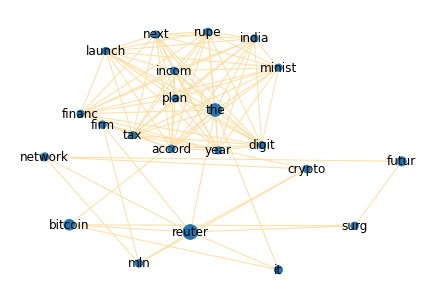

In [ ]:
# 단어 네트워크를 그릴 Graph
G = nx.Graph()

# 단어 그래프에 단어 노드 추가
for i in range(len(node_dgr)):
    if dgr[node_dgr[i]] >= 0.1:
        G.add_node(node_dgr[i], nodesize = dgr[node_dgr[i]])

# edge 추가
for i in range(len(result_df)):
    if result_df['word1'][i] in list(G.nodes):
        if result_df['word2'][i] in list(G.nodes):
            G.add_weighted_edges_from([(result_df['word1'][i], result_df['word2'][i], int(result_df['freq'][i]))])

sizes = [G.nodes[node]['nodesize']*500 for node in G]

options = {
    'edge_color' : '#FFDEA2',
    'width':1,
    'with_labels':True,
    'font_weight':'regular',
}

nx.draw(G, node_size = sizes, pos=nx.spring_layout(G, k=3.5, iterations=100),**options)
#ax = plt.gca()
#ax.collections[0].set_edgecolor('#555555')
plt.show()

## Exercise - 한국어 article network analysis

In [ ]:
file_path = '/content/drive/MyDrive/2022년도 겨울 특강-텍스트마이닝/Text_mining_3강/data/abstract_list.txt'

f = open(file_path, encoding='utf-8')

import konlpy.tag
okt = konlpy.tag.Okt()

pos_sentence = []

for line in f:
    line = line.strip()
    tokenized_word_list = okt.nouns(line)

    pos_sentence.append(tokenized_word_list)

f.close()

In [ ]:
print(pos_sentence[:3])

[['하이퍼링크', '기반', '추론', '웹', '하이퍼텍스트', '기능', '이용', '함', '접근성', '멀티미디어', '기능', '응답', '시간', '서버', '안정', '사용', '및', '업그레이드', '용이', '플랫폼', '독립성', '등', '의료', '전문가', '시스템', '구현', '수', '해', '전문가', '규칙', '서로', '하이퍼링크', '문서', '웹', '서버', '적재', '후', '추론', '기능', '제공', '문서', '자체', '개발', '기반', '의사결정', '그래프', '편집', '도구', '자동', '관리', '불구', '의료', '분야', '전문가', '시스템', '규칙', '베이스', '크기', '경우', '지식', '공학자', '이', '규칙', '작업', '입력', '관리', '것', '매우', '따라서', '연구', '고혈압', '관리', '위', '의사결정', '그래프', '자동', '생', '시스템', '개발', '일련', '과정', '통', '연구', '하이퍼링크', '기반', '추론', '기법', '이용', '웹', '기반', '의료', '전문가', '시스템', '개발', '방법론', '제시', '그', '응용', '응답속도', '안정', '웹', '기반', '고혈압', '관리', '시스템', '구현'], ['인터넷', '확산', '이제', '웹', '단지', '커뮤니케이션', '홍보', '쇼핑', '수단', '정보', '보급', '및', '창고', '로서', '역할', '더욱', '또한', '과거', '웹', '기반', '기술', '하이퍼텍스트', '멀티미디어', '기술', '접목', '하이퍼미디어', '개념', '도입', '텍스트', '외', '이미지', '동영상', '사운드', '등', '형식', '미디어', '통해', '정보', '접', '수', '정보공', '정보', '양', '기하', '급수', '증가', '함', '웹', '이용자', '인지', '부하', '로', '웹', '상

In [ ]:
pair_word = {}

for document in pos_sentence:
    for i, word in enumerate(document):
        for word2 in document[i+1:]:
            if word>word2: pair_word[word2,word] = pair_word.get((word2,word),0)+1
            else: pair_word[word, word2] = pair_word.get((word,word2),0)+1

In [ ]:
pair_word

{('기반', '하이퍼링크'): 15,
 ('추론', '하이퍼링크'): 9,
 ('웹', '하이퍼링크'): 12,
 ('하이퍼링크', '하이퍼텍스트'): 3,
 ('기능', '하이퍼링크'): 9,
 ('이용', '하이퍼링크'): 6,
 ('하이퍼링크', '함'): 3,
 ('접근성', '하이퍼링크'): 3,
 ('멀티미디어', '하이퍼링크'): 3,
 ('응답', '하이퍼링크'): 3,
 ('시간', '하이퍼링크'): 3,
 ('서버', '하이퍼링크'): 6,
 ('안정', '하이퍼링크'): 6,
 ('사용', '하이퍼링크'): 3,
 ('및', '하이퍼링크'): 3,
 ('업그레이드', '하이퍼링크'): 3,
 ('용이', '하이퍼링크'): 3,
 ('플랫폼', '하이퍼링크'): 3,
 ('독립성', '하이퍼링크'): 3,
 ('등', '하이퍼링크'): 3,
 ('의료', '하이퍼링크'): 9,
 ('전문가', '하이퍼링크'): 12,
 ('시스템', '하이퍼링크'): 15,
 ('구현', '하이퍼링크'): 6,
 ('수', '하이퍼링크'): 3,
 ('하이퍼링크', '해'): 3,
 ('규칙', '하이퍼링크'): 9,
 ('서로', '하이퍼링크'): 3,
 ('하이퍼링크', '하이퍼링크'): 3,
 ('문서', '하이퍼링크'): 6,
 ('적재', '하이퍼링크'): 3,
 ('하이퍼링크', '후'): 3,
 ('제공', '하이퍼링크'): 3,
 ('자체', '하이퍼링크'): 3,
 ('개발', '하이퍼링크'): 9,
 ('의사결정', '하이퍼링크'): 6,
 ('그래프', '하이퍼링크'): 6,
 ('편집', '하이퍼링크'): 3,
 ('도구', '하이퍼링크'): 3,
 ('자동', '하이퍼링크'): 6,
 ('관리', '하이퍼링크'): 12,
 ('불구', '하이퍼링크'): 3,
 ('분야', '하이퍼링크'): 3,
 ('베이스', '하이퍼링크'): 3,
 ('크기', '하이퍼링크'): 3,
 ('경우', '하이퍼링크'): 3,
 ('지식', '하이퍼링크

In [ ]:
# 동시 출현 빈도 데이터 프레임 만들기

ko_df = pd.DataFrame.from_dict(pair_word, orient = 'index')

ko_dflist = []
for i in range(len(ko_df)):
    ko_dflist.append([ko_df.index[i][0], ko_df.index[i][1], ko_df[0][i]])

pair_df = pd.DataFrame(ko_dflist, columns = ['word1', 'word2', 'freq'])

In [ ]:
# 중심성 척도 계산
ko_centrality = nx.Graph()

# edge 설정하기
for i in range(len(pair_df)):
    ko_centrality.add_edge(pair_df['word1'][i], pair_df['word2'][i], weight = int(pair_df['freq'][i]))

dgr_ko = nx.degree_centrality(ko_centrality)
btw_ko = nx.betweenness_centrality(ko_centrality)
cls_ko = nx.closeness_centrality(ko_centrality)

In [ ]:
node_dgr = list(dgr_ko.keys())

In [ ]:
import operator
dgr_dict_ko = sorted(dgr_ko.items(), key=operator.itemgetter(1))
dgr_dict_ko[-200:]

[('형태', 0.3272377285851781),
 ('다수', 0.3277189605389798),
 ('점수', 0.32868142444658327),
 ('효율', 0.32964388835418673),
 ('정확성', 0.3306063522617902),
 ('세부', 0.3310875842155919),
 ('작업', 0.33156881616939365),
 ('두', 0.3320500481231954),
 ('기준', 0.3354186717998075),
 ('뿐', 0.3354186717998075),
 ('정의', 0.3378248315688162),
 ('정도', 0.33830606352261794),
 ('전통', 0.33830606352261794),
 ('즉', 0.33878729547641967),
 ('의견', 0.3392685274302214),
 ('의사결정', 0.33974975938402313),
 ('제품', 0.33974975938402313),
 ('지속', 0.34023099133782486),
 ('다른', 0.34311838306063525),
 ('각각', 0.34456207892204044),
 ('토픽', 0.34504331087584217),
 ('별', 0.34504331087584217),
 ('값', 0.3455245428296439),
 ('가능성', 0.34648700673724736),
 ('구현', 0.3474494706448508),
 ('인공', 0.3474494706448508),
 ('기사', 0.3484119345524543),
 ('미디어', 0.34937439846005774),
 ('표현', 0.3498556304138595),
 ('빈도', 0.3498556304138595),
 ('기대', 0.35081809432146294),
 ('양', 0.3512993262752647),
 ('환경', 0.3522617901828682),
 ('이슈', 0.3527430221366699),

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-comp

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = "+fontInfo.fname)

NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf


In [ ]:
# 단어 네트워크를 그릴 Graph
G_ko = nx.Graph()

# 단어 그래프에 단어 노드 추가
for i in range(len(node_dgr)):
    if dgr_ko[node_dgr[i]] >= 0.4:
        G_ko.add_node(node_dgr[i], nodesize = dgr_ko[node_dgr[i]])

# edge 추가
for i in range(len(pair_df)):
    if pair_df['word1'][i] in list(G_ko.nodes):
        if pair_df['word2'][i] in list(G_ko.nodes):
            if not pair_df['word1'][i] == pair_df['word2'][i]:
                G_ko.add_weighted_edges_from([(pair_df['word1'][i], pair_df['word2'][i], int(pair_df['freq'][i]))])

sizes = [G_ko.nodes[node]['nodesize']*500 for node in G_ko]
pos=nx.spring_layout(G_ko, k=3.5, iterations=100)

plt.figure(figsize = (25,25))

font_path = '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf'
fontprop = fm.FontProperties(fname = font_path, size =18).get_name()

options = {
    'edge_color' : '#FFDEA2',
    'width':1,
    'with_labels':True,
    'font_weight':'regular',
    'font_family' : fontprop,
    'font_size' : 35
}

nx.draw(G_ko, node_size = sizes, pos=pos,**options)
#nx.draw_networkx_labels(G_ko, pos=pos, font_family = fontprop , font_size = 30)

ax = plt.gca()
ax.collections[0].set_edgecolor('#555555')

plt.show()

Output hidden; open in https://colab.research.google.com to view.

노드의 크기 : 각 단어의 연결 중심성
엣지의 굵기 : 해당 단어 쌍의 frequency에 따른 가중치 부여

노드가 클수록 해당 단어의 연결 중심성이 크다.

불용어 단어들의 등장으로 인해 그래프의 모형을 해석하기에 어렵게 나타남

In [ ]:
# 불용어 단어들을 삭제해보고 다시 그려보자
stopwords_ko = ['위해', '의', '및', '개', '이','등','수', '위','중', '각','함','를','그',' 것','음','대해','간','생','더','점']
# 마+이닝 단어를 합쳐야할 필요
# 키+워드 단어들 합쳐야할 필요